#Uczenie głębokie

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [7]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df["age"]= np.log(df.age)
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)

In [9]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

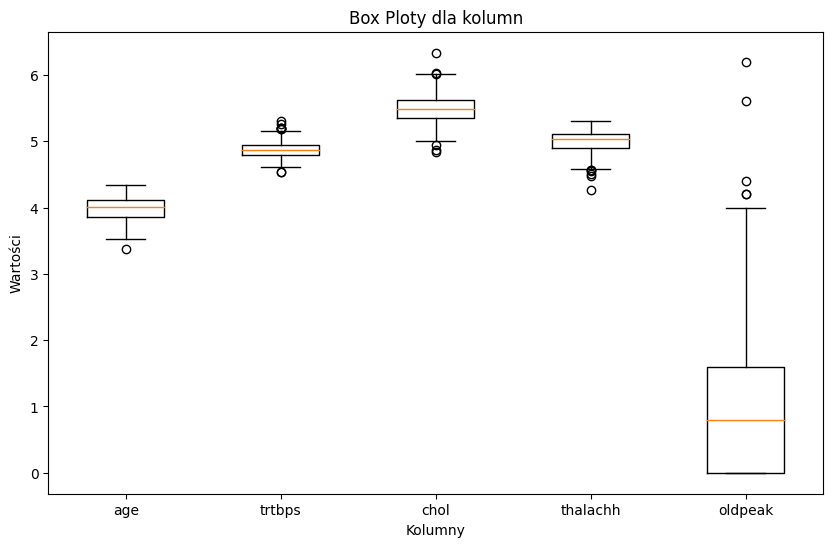

In [10]:
# Tworzenie box plotów
selected_columns = continous_cols
selected_df = df[selected_columns]
plt.figure(figsize=(10, 6))
plt.boxplot(selected_df, labels=selected_df.columns)
plt.title('Box Ploty dla kolumn')
plt.xlabel('Kolumny')
plt.ylabel('Wartości')

# Wyświetlanie box plotów
plt.show()

In [11]:
features = df.iloc[:, :13]
labels = df.iloc[:, 13]

In [12]:
#Data Splitting
X=df.iloc[:,:13]
y=df["output"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=65)

#MinMax
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, y=y_train, batch_size=10, validation_split=0.1, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
22/22 - 1s - loss: 0.6937 - accuracy: 0.4470 - val_loss: 0.6742 - val_accuracy: 0.4800 - 1s/epoch - 67ms/step
Epoch 2/50
22/22 - 0s - loss: 0.6750 - accuracy: 0.4747 - val_loss: 0.6605 - val_accuracy: 0.6400 - 62ms/epoch - 3ms/step
Epoch 3/50
22/22 - 0s - loss: 0.6601 - accuracy: 0.6267 - val_loss: 0.6464 - val_accuracy: 0.7200 - 63ms/epoch - 3ms/step
Epoch 4/50
22/22 - 0s - loss: 0.6414 - accuracy: 0.7235 - val_loss: 0.6240 - val_accuracy: 0.7600 - 70ms/epoch - 3ms/step
Epoch 5/50
22/22 - 0s - loss: 0.6110 - accuracy: 0.7604 - val_loss: 0.5949 - val_accuracy: 0.7200 - 63ms/epoch - 3ms/step
Epoch 6/50
22/22 - 0s - loss: 0.5725 - accuracy: 0.7558 - val_loss: 0.5737 - val_accuracy: 0.8000 - 84ms/epoch - 4ms/step
Epoch 7/50
22/22 - 0s - loss: 0.5329 - accuracy: 0.7650 - val_loss: 0.5471 - val_accuracy: 0.8000 - 66ms/epoch - 3ms/step
Epoch 8/50
22/22 - 0s - loss: 0.4980 - accuracy: 0.7604 - val_loss: 0.5263 - val_accuracy: 0.8000 - 59ms/epoch - 3ms/step
Epoch 9/50
22/22 - 0s - l

Walidacja utknęła w dziwnym minimum lokalnym.

In [15]:
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.fit(x=X_train, y=y_train, batch_size=10, validation_split=0.1, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
22/22 - 2s - loss: 0.7121 - accuracy: 0.3502 - val_loss: 0.6970 - val_accuracy: 0.5200 - 2s/epoch - 110ms/step
Epoch 2/50
22/22 - 0s - loss: 0.6714 - accuracy: 0.6175 - val_loss: 0.6694 - val_accuracy: 0.6000 - 121ms/epoch - 6ms/step
Epoch 3/50
22/22 - 0s - loss: 0.6401 - accuracy: 0.7696 - val_loss: 0.6364 - val_accuracy: 0.7200 - 146ms/epoch - 7ms/step
Epoch 4/50
22/22 - 0s - loss: 0.5902 - accuracy: 0.7926 - val_loss: 0.5881 - val_accuracy: 0.7600 - 168ms/epoch - 8ms/step
Epoch 5/50
22/22 - 0s - loss: 0.5311 - accuracy: 0.7972 - val_loss: 0.5525 - val_accuracy: 0.7600 - 145ms/epoch - 7ms/step
Epoch 6/50
22/22 - 0s - loss: 0.4731 - accuracy: 0.8065 - val_loss: 0.5279 - val_accuracy: 0.7200 - 146ms/epoch - 7ms/step
Epoch 7/50
22/22 - 0s - loss: 0.4293 - accuracy: 0.8111 - val_loss: 0.5500 - val_accuracy: 0.6800 - 103ms/epoch - 5ms/step
Epoch 8/50
22/22 - 0s - loss: 0.4078 - accuracy: 0.8387 - val_loss: 0.5525 - val_accuracy: 0.7600 - 162ms/epoch - 7ms/step
Epoch 9/50
22/22 

Skomplikowanie modelu nie poprawiło rezultatów.

In [16]:
from tensorflow.keras.layers import Dropout

model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_dim=13))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.2)) #dodajemy dropout
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 0.6672 - accuracy: 0.6529 - val_loss: 0.6302 - val_accuracy: 0.8197
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6353 - accuracy: 0.7273 - val_loss: 0.5919 - val_accuracy: 0.8525
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6058 - accuracy: 0.7190 - val_loss: 0.5511 - val_accuracy: 0.8525
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5835 - accuracy: 0.7521 - val_loss: 0.5037 - val_accuracy: 0.8689
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5591 - accuracy: 0.7231 - val_loss: 0.4565 - val_accuracy: 0.8525
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5324 - accuracy: 0.7686 - val_loss: 0.4097 - val_accuracy: 0.8852
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5211 - accuracy: 0.7521 - val_loss: 0.3692 - val_accuracy: 0.8689
Epoch 8/100
8/8 [========

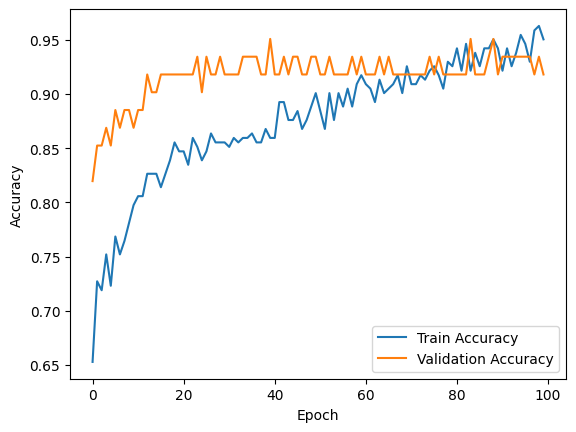

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

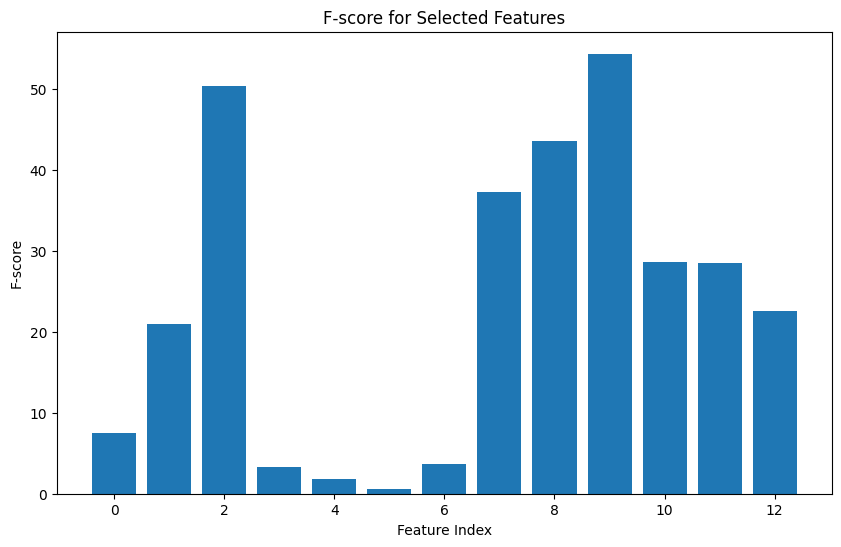

In [19]:
#FSCORE
selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(X_train, y_train)

selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)

f_scores = selector.scores_

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(f_scores)), f_scores)
plt.xlabel('Feature Index')
plt.ylabel('F-score')
plt.title('F-score for Selected Features')
plt.show()

In [20]:
f_score_indexes = (-selector.scores_).argsort()[:9]
print(f_score_indexes)

[ 9  2  8  7 10 11 12  1  0]


In [28]:
selected_features_train = X_train[:, [8, 7, 2, 9, 11, 12, 10, 1, 0]]
selected_features_test = X_test[:, [8, 7, 2, 9, 11, 12, 10, 1, 0]]

In [29]:
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_dim=selected_features_train.shape[1]))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))


model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model_4.fit(selected_features_train, y_train, epochs=100, batch_size=32, validation_data=(selected_features_test, y_test))

Epoch 1/100
8/8 [==============================] - 2s 44ms/step - loss: 0.6814 - accuracy: 0.6281 - val_loss: 0.6490 - val_accuracy: 0.8689
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6561 - accuracy: 0.7686 - val_loss: 0.6142 - val_accuracy: 0.8689
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6299 - accuracy: 0.7727 - val_loss: 0.5771 - val_accuracy: 0.8525
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6051 - accuracy: 0.7893 - val_loss: 0.5385 - val_accuracy: 0.8689
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5778 - accuracy: 0.7893 - val_loss: 0.4976 - val_accuracy: 0.8361
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5517 - accuracy: 0.7851 - val_loss: 0.4527 - val_accuracy: 0.8361
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5212 - accuracy: 0.7893 - val_loss: 0.4098 - val_accuracy: 0.8852
Epoch 8/100
8/8 [=========

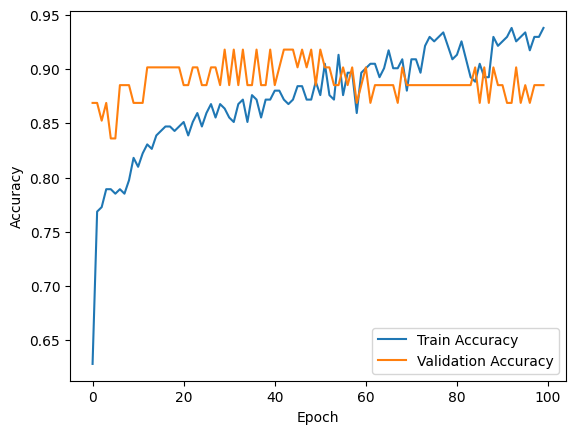

In [30]:
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()